In [487]:
from PIL import Image
import glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


## 학습용 데이터
### 데이터 불러오기 + Resize하기

In [488]:
import os

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        
    print(len(images), " images resized.")
    
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [489]:
import os

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        
    print(len(images), " images resized.")
    
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [490]:
import os

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
        
    print(len(images), " images resized.")
    
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


### 폴더 별 라벨링 & 정규화

In [491]:
import numpy as np
from sklearn.model_selection import train_test_split

def load_data(img_path, number_of_data=300):
    img_size=28
    color=3
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img  
        labels[idx]=0  
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img  
        labels[idx]=1 
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/300 

x_train, x_valid, y_train, y_valid = train_test_split(x_train_norm, y_train, test_size=0.3, random_state=25)

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (210, 28, 28, 3)
y_train shape: (210,)


### 이미지 불러오기

라벨 :  1


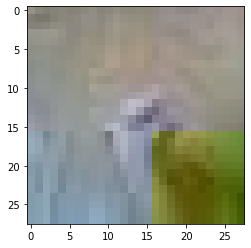

In [492]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨 : ', y_train[0])

### 네트워크 설계

In [493]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(512, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(256, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 26, 26, 512)       14336     
_________________________________________________________________
max_pooling2d_78 (MaxPooling (None, 13, 13, 512)       0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 11, 11, 256)       1179904   
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 5, 5, 256)         0         
_________________________________________________________________
flatten_39 (Flatten)         (None, 6400)              0         
_________________________________________________________________
dense_78 (Dense)             (None, 200)               1280200   
_________________________________________________________________
dense_79 (Dense)             

### 모델 학습

In [494]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid), batch_size=100)

Epoch 1/100
3/3 [==============================] - 0s 82ms/step - loss: 1.3656 - accuracy: 0.2667 - val_loss: 1.1173 - val_accuracy: 0.3000
Epoch 2/100
3/3 [==============================] - 0s 29ms/step - loss: 1.1100 - accuracy: 0.3476 - val_loss: 1.1097 - val_accuracy: 0.3000
Epoch 3/100
3/3 [==============================] - 0s 29ms/step - loss: 1.0982 - accuracy: 0.3476 - val_loss: 1.1012 - val_accuracy: 0.3000
Epoch 4/100
3/3 [==============================] - 0s 26ms/step - loss: 1.0969 - accuracy: 0.3476 - val_loss: 1.0968 - val_accuracy: 0.3000
Epoch 5/100
3/3 [==============================] - 0s 23ms/step - loss: 1.0977 - accuracy: 0.3476 - val_loss: 1.0975 - val_accuracy: 0.3000
Epoch 6/100
3/3 [==============================] - 0s 23ms/step - loss: 1.0913 - accuracy: 0.3476 - val_loss: 1.0919 - val_accuracy: 0.3000
Epoch 7/100
3/3 [==============================] - 0s 22ms/step - loss: 1.0866 - accuracy: 0.3762 - val_loss: 1.0868 - val_accuracy: 0.3333
Epoch 8/100
3/3 [===

# 시험용 데이터
### 데이터 불러오기 + Resize하기

In [495]:
import os

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor_train_test"

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

resize_images(image_dir_path)

print("가위 테스트 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 테스트 이미지 resize 완료!


In [496]:
import os

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_train_test"

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

resize_images(image_dir_path)

print("바위 테스트 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 테스트 이미지 resize 완료!


In [497]:
import os

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper_train_test"

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

resize_images(image_dir_path)

print("보 테스트 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 테스트 이미지 resize 완료!


### 폴더 별 라벨링 & 정규화

In [498]:
import numpy as np

def load_data(img_path, number_of_data=300):
    img_size=28
    color=3
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor_train_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img  
        labels[idx]=0  
        idx=idx+1

    for file in glob.iglob(img_path+'/rock_train_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img  
        labels[idx]=1 
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper_train_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    
        labels[idx]=2
        idx=idx+1
        
    print("시험용데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/300

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

시험용데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


# TEST

In [499]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose = 2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

10/10 - 0s - loss: 357.1061 - accuracy: 0.5800
test_loss : 357.1060791015625
test_accuracy : 0.5799999833106995


# 회고

정확도를 높이기 위해 다양한 방법을 시도해보고 구글링도 해보았다.
학습용 데이터로 학습할 때는 높게 나오지만 시험용 데이터로 확인해볼 땐 30% 근처를 자꾸 맴돈다. 그래서 시도한 방법은 다음과 같다. ① 학습용 데이터 수를 300개 → 900개로 늘려서 진행 ② 학습 반복 횟수(epoch)를 늘림 ③ 데이터를 train, validation, test로 분리함 ④ 하이퍼 파라미터, 필터 수를 늘림

① 총 4명(각 300개 총 1200개)의 데이터로 학습 및 테스트를 해보았다. 학습용 데이터는 900개, 시험용 데이터는 300개로 진행을 하였는데 여전히 정확도가 낮았다.

② epoch를 늘렸지만 늘릴수록 overfitting(과적합)이 나와서 테스트 시 정확도를 높일 수 없었다.

③ 데이터를 trian, validation, test로 분리하여 진행하였다. 분리하여 진행하고 난 뒤 정확도가 이전에 비해 올라간 것을 확인할 수 있었다. 나름 정확도 높이는데에 도움이 되었다고 판단된다.

④ 하이퍼 파라미터 값을 2의 제곱 수 만큼 높이면서 정확도를 확인하였다. 한 단계씩 높이면서 확인해보았는데, 정확도가 이전에 비해 조금 올랐다.

▶▶ 한 가지 의문이 드는 건, 매번 똑같은 코드로 실행을 해도 정확도가 달라진다는 점이다. 정확도가 70%까지 갔다가 다시 30%로 내려가기도 한다. 왜 이렇게 되는 지, 무언가가 잘못되었기에 그런건지 매우 궁금해진다. 또, 프로젝트를 하면서 궁금했던 점은 과적합을 막는 방법이다. 여러가지 방법들이 있긴 했지만 적용하는 것이 쉽지가 않았다. 이 부분을 좀 더 공부해야겠다는 생각이 들었다. 꾸준한 수치로 정확도가 나왔으면 했지만 그렇지 않아서 아쉽고 다같이 해당 프로젝트의 정확도를 높이는 방법에 대해 이야기하고 결과를 내고 싶다. 